# Iris Flower Classification

Machine learning is a branch of artificial intelligence that enables computers to learn from data and make predictions. One of the common applications of machine learning is classification, which is the task of assigning a label to an input based on some criteria. In this tutorial, we will use the iris dataset, which contains 150 samples of three different species of iris flowers, along with their sepal and petal measurements. Our goal is to build a machine learning model that can classify a new iris sample based on its features.

![iris](iris.jpg)  

Figure: Iris flower

Source: https://shorturl.at/xAFX8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score,  make_scorer

pd.set_option('display.max_columns', 34) 
plt.style.use('fivethirtyeight')


%matplotlib inline

C:\Users\kevin\AppData\Local\Temp\ipykernel_15556\96470124.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df['species'] = df['species'].str.removeprefix('Iris-')


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\Users\kevin\AppData\Local\Temp\ipykernel_15556\2558100330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species',


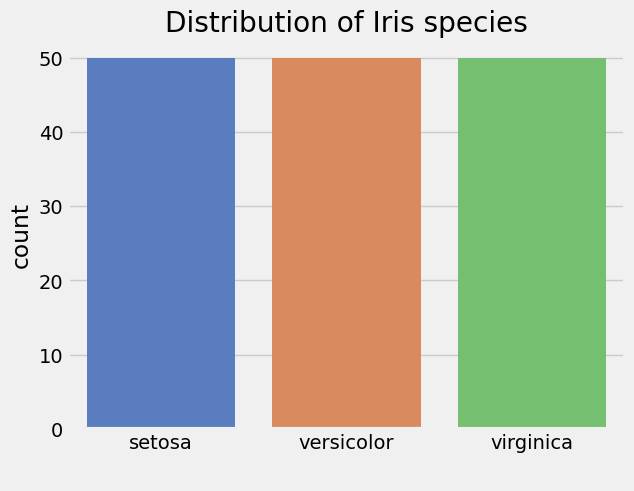

In [7]:
sns.countplot(x='species',
              data=df, palette='muted',
              orient='h')
plt.title('Distribution of Iris species')
plt.xlabel(" ")
plt.show()


c:\Users\kevin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x800 with 0 Axes>

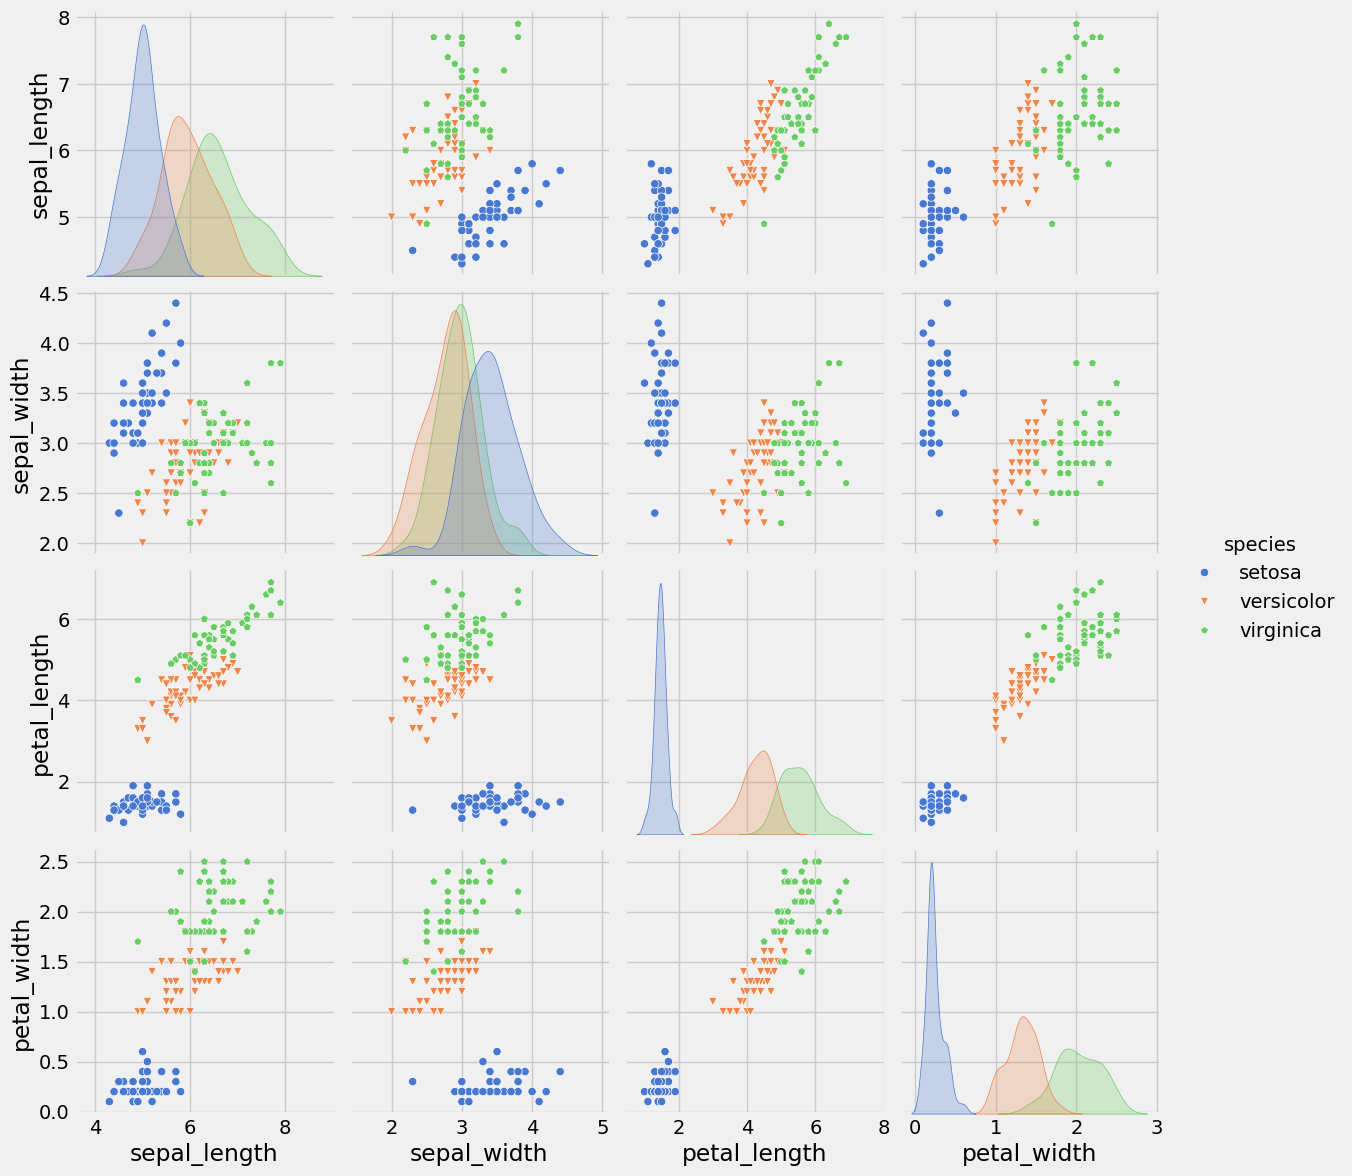

In [8]:

plt.figure(figsize=(8, 8))
sns.pairplot(data=df,
             hue="species",
             size=3,
             palette='muted', 
             markers=['o', 'v', 'p'])
plt.show()

In [9]:
df['species'] =  df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

C:\Users\kevin\AppData\Local\Temp\ipykernel_15556\173079884.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] =  df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


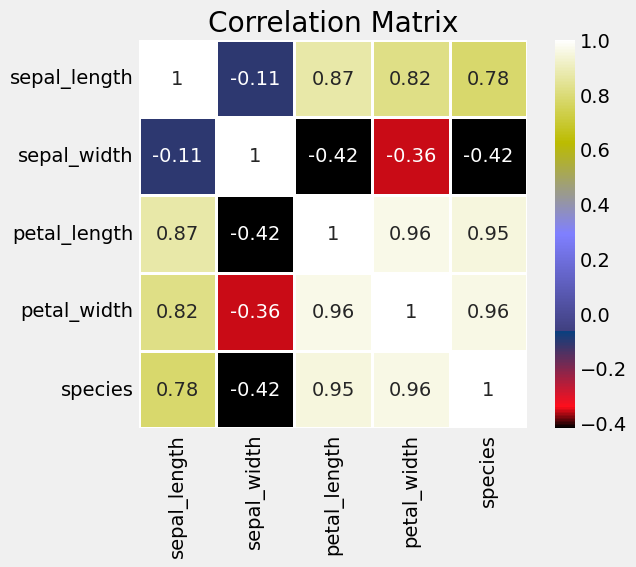

In [10]:
sns.heatmap(df.corr(),
            cmap='gist_stern',
            annot=True, 
            square=True,
            linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
X = df.drop('species', axis=1)
y = df['species']

Pipeline


In [12]:
pipeline = Pipeline(steps=[
    ('scale', StandardScaler()), 
    ('classifier', RandomForestClassifier())
])

Train-Test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [15]:
score = pipeline.score(X_test, y_test)
percentage = score * 100
print("%.3f" % percentage, "%")

100.000 %


In [16]:
y_pred = pipeline.predict(X_test)

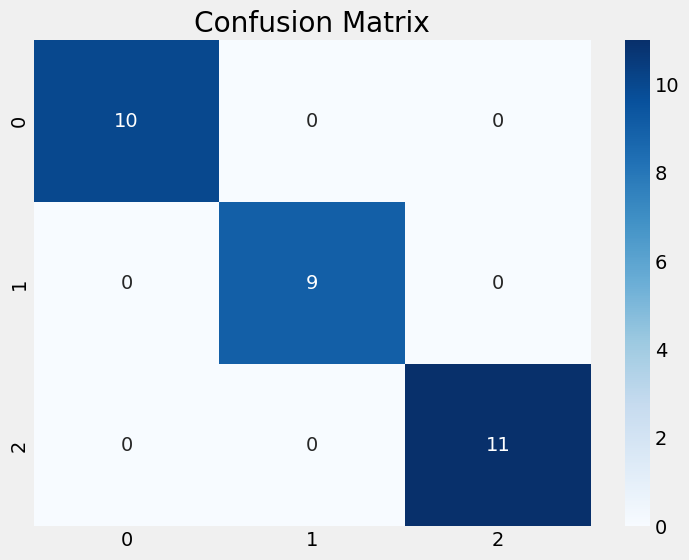

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()